In [643]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.fft import fft, fftfreq
from scipy import signal
import json


# Project Overview

## 1.  What is Palaeoclimatology,
* Palaeoclimatology explained

## 2. Analyse CO2 vs Temperature Anomaly from 800kyrs – present. 

### CO2:
* Import CO2 Nature dataset and analyse.
* import CO2 IPCC dataset and analyse.
* import Mauna loa dataset and analyse.
* fuse Nature and Mauna Loa datasets.
* save fused Nature and Mauna Loa dataset as .csv & . json files

### Temperature:
* Import temperature NOAA dataset and analyse.
* Import temperature Jouzel dataset and analyse.

## 3. Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
* Import methane dataset and analyse.

## 4. Examine Irish context: 
* Import irsih rainfall dataset and analyse.
* Import irish temperature dataset and analyse.

## 5.  Fuse and analyse data from various data sources and format fused data set as a pandas  dataframe and export to csv and json formats 
* fused datasets will be created and saved in .csv and .json formats in folder called "fused datsets. 

## 6. For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).
* Temporal lead/lag analysis
* Frequency Analysis
* Fourier Transform analaysis


## 7. Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue
* Linear regression model to predict temperature anomaly over next 30 years
* Comaprision to published climate model

## 8. Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)
* Discussion on accelerated warming and its effects.
* how accelerated warming is affecting polar ice coverage
* how polar ice coverage is effecting co2 and methane levels

***


# 1. What is Palaeoclimatology


Palaeoclimatology [1] *Paleoclimatology*, Wikipedia, https://en.wikipedia.org/wiki/Paleoclimatology  is the scientific study of climates predating the invention of meteorological instruments, when no direct measurement data were available. Paleoclimatology uses a variety of proxy methods to obtain data previously preserved, but the datasets used in this project for CO2, Temperature and Methane are preserved at Ice-coring projects in the ice caps of Greenland and Antarctica. The aim is to use this data to analyse how the earths atmosphere was throughout history. The information in these datasets can tell us information going back 800,000 years, in the case of the EPICA project. 

By comparing current climate with past data, we can asess the impacts of humans on the environment (CO2 increase).

***

# 2. Analyse CO2 vs Temperature Anomaly from 800kyrs – present. 

### CO2 Analysis

I will Import CO2 datsets from *IPCC*, *Nature* and *Mauna loa*, which are saved in folder called "imported_databases. I will examine each dataset and plot the relebant variables to determine which dataset is most suitable for further analysis. 


The Naure dataset [2] *Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present*, AGU PUBLICATIONS, https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1002/2014GL061957  is from a study by Luthi et al. (2008) on C02 from the EPICA Dome C ice core in Antartica. This dataset contains the gas age and the CO2 concentration levels. This dataset contains the reconstruction of CO2 concentrations as far back as 800 kyr B.P. (thousand years before present, where present is defined as 1950). This dataset is availabe from the Pangea website.

In [644]:
co2_nature = pd.read_excel('imported_datasets/C02 Nature Paper.xlsx',sheet_name= '3.  Composite CO2',skiprows=range(6))
co2_nature

,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
...,...,...
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4


In [645]:
co2_nature.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [646]:
co2_nature.describe()

,EDC3_gas_a (yr),CO2 (ppmv)
count,1096.000000,1096.000000
mean,390905.979015,230.835675
std,262092.947239,27.573616
min,137.000000,171.600000
25%,137133.500000,207.500000
50%,423206.500000,231.450000
75%,627408.000000,251.525000
max,798512.000000,298.600000


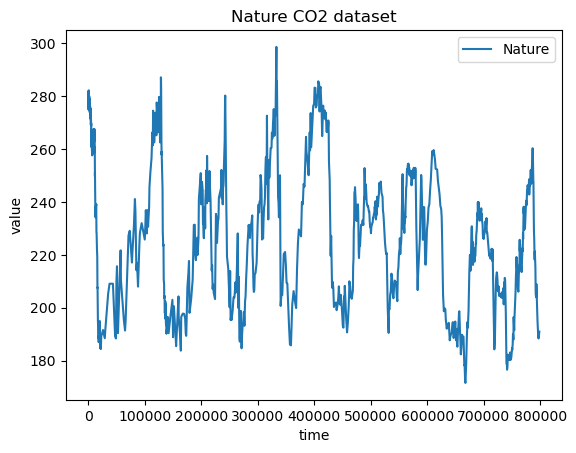

In [647]:
plt.plot(co2_nature['EDC3_gas_a (yr)'],co2_nature['CO2 (ppmv)'], label = 'Nature')
plt.xlabel('time')
plt.ylabel('value')
plt.title('Nature CO2 dataset')
plt.legend()
plt.show()

## IPCC C02 Dataset

https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/2014GL061957
The second CO2 dataset to import is IPCC dataset.The EPICA Dome C CO2 [2] *Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present*, AGU PUBLICATIONS, https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1002/2014GL061957 is a dataset that provides information about the atmospheric CO2 concentrations over the past 800,000 years, based on the analysis of air bubbles trapped in Antarctic ice cores. The dataset is derived from the EPICA Dome C ice core, which was drilled at a site in East Antarctica with an average annual temperature of -54.5°C .The datset is available [3] *Antarctic Ice Cores Revised 800KYr CO2 Data*, National Oceanic and Atmospheric Administration,  https://www.ncei.noaa.gov/access/paleo-search/study/17975.This dataset contains the reconstruction of CO2 concentrations as far back as 800 kyr B.P. (thousand years before present, where present is defined as 1950).


In [648]:
# Read the Excel file into a pandas DataFrame and exclude inital 14 rows
co2_ipcc = pd.read_excel('imported_datasets/C02 IPCC Report.xlsx',sheet_name= 'CO2 Composite',skiprows=range(14))
co2_ipcc

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007
...,...,...,...
1896,803925.284376,202.921723,2.064488
1897,804009.870607,207.498645,0.915083
1898,804522.674630,204.861938,1.642851
1899,805132.442334,202.226839,0.689587


In [649]:
#stripping blank spaces
co2_ipcc.columns = co2_ipcc.columns.str.lstrip()
co2_ipcc.columns = co2_ipcc.columns.str.rstrip()

In [650]:
co2_nature.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [651]:
co2_nature.describe()

,EDC3_gas_a (yr),CO2 (ppmv)
count,1096.000000,1096.000000
mean,390905.979015,230.835675
std,262092.947239,27.573616
min,137.000000,171.600000
25%,137133.500000,207.500000
50%,423206.500000,231.450000
75%,627408.000000,251.525000
max,798512.000000,298.600000


Plotting IPCC CO2 Dataset

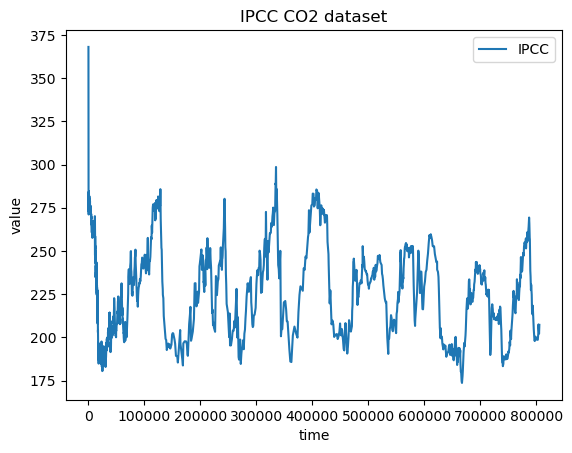

In [652]:
plt.plot(co2_ipcc['Gasage (yr BP)'],co2_ipcc['CO2 (ppmv)'],label = 'IPCC')
plt.xlabel('time')
plt.ylabel('value')
plt.title('IPCC CO2 dataset')
plt.legend()
plt.show()

## Comparing Nature CO2 and IPCC Dataset

From the plot below, we can see that the datasets are very closely aligned, but that the IPCC datset contains more datapoints.

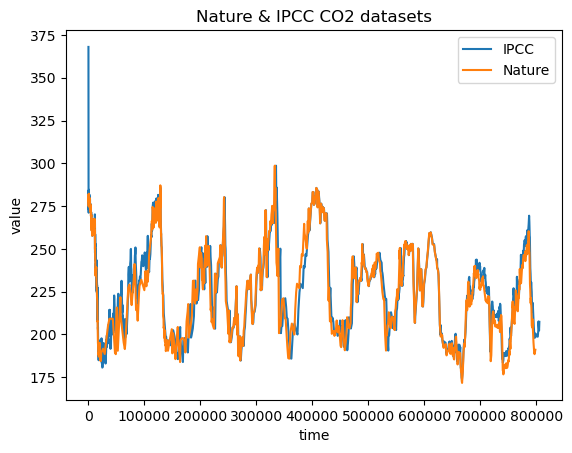

In [653]:
plt.plot(co2_ipcc['Gasage (yr BP)'],co2_ipcc['CO2 (ppmv)'], label = 'IPCC')
plt.plot(co2_nature['EDC3_gas_a (yr)'],co2_nature['CO2 (ppmv)'], label = 'Nature')
plt.xlabel('time')
plt.ylabel('value')
plt.title('Nature & IPCC CO2 datasets')
plt.legend()
plt.show()

## Mauna Loa CO2 dataset

The third C02 datset to import is the Mauna Loa dataset which measures the CO2 concentrations at the Mauna Loa observatorty in Hawaii. This dataset is the longest continuos record of CO2 in the atmosphere, starting in 1958. [4] *NOAA Atmospheric Carbon Dioxide Mole Fractions from Mauna Loa Observatory, Hawaii, United States*, National Oceanic and Atmospheric Administration,  https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc%3AC00890

In [654]:
co2_mauna_loa=pd.read_csv('imported_datasets/Mauna Loa CO2.csv',skiprows=range(43))
co2_mauna_loa

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12
...,...,...,...
59,2018,408.72,0.12
60,2019,411.65,0.12
61,2020,414.21,0.12
62,2021,416.41,0.12


In [655]:
co2_mauna_loa.dtypes

year      int64
mean    float64
unc     float64
dtype: object

In [656]:
co2_mauna_loa.describe()

,year,mean,unc
count,64.000000,64.000000,6.400000e+01
mean,1990.500000,358.293437,1.200000e-01
std,18.618987,30.580414,9.791247e-17
min,1959.000000,315.980000,1.200000e-01
25%,1974.750000,330.895000,1.200000e-01
50%,1990.500000,355.075000,1.200000e-01
75%,2006.250000,382.572500,1.200000e-01
max,2022.000000,418.530000,1.200000e-01


I will now join the Mauna Loa dataset and the Nature dataset to have a more complete datset to analysie.

I need to change names of columns and convert Mauna Loa data to match format of Nature CO2 dataset to ensure data is fused correctly.

In [657]:
co2_mauna_loa = co2_mauna_loa.rename(columns=(({'year':'EDC3_gas_a (yr)'})))
co2_mauna_loa = co2_mauna_loa.rename(columns=(({'mean':'CO2 (ppmv)'})))

In [658]:
base = 1950
co2_mauna_loa['EDC3_gas_a (yr)'] = base - co2_mauna_loa['EDC3_gas_a (yr)']

In [659]:
co2_mauna_loa

,EDC3_gas_a (yr),CO2 (ppmv),unc
0,-9,315.98,0.12
1,-10,316.91,0.12
2,-11,317.64,0.12
3,-12,318.45,0.12
4,-13,318.99,0.12
...,...,...,...
59,-68,408.72,0.12
60,-69,411.65,0.12
61,-70,414.21,0.12
62,-71,416.41,0.12


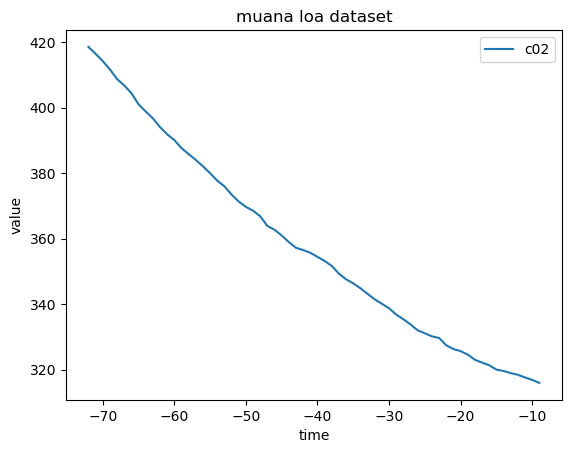

In [660]:
plt.plot(co2_mauna_loa['EDC3_gas_a (yr)'],co2_mauna_loa['CO2 (ppmv)'] ,label ='c02')
plt.xlabel('time')
plt.ylabel('value')
plt.title('muana loa dataset')
plt.legend()
plt.show()

comparing datasets before merging to ensure compatabillity

In [661]:
co2_nature.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [662]:
co2_mauna_loa.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
unc                float64
dtype: object

Creating a new dataset called "co2_nature_mauna_loa"

In [663]:
co2_nature_mauna_loa = pd.concat([co2_mauna_loa, co2_nature])
co2_nature_mauna_loa = co2_nature_mauna_loa.drop(['unc'],axis =1)

In [664]:
co2_nature_mauna_loa

,EDC3_gas_a (yr),CO2 (ppmv)
0,-9,315.98
1,-10,316.91
2,-11,317.64
3,-12,318.45
4,-13,318.99
...,...,...
1091,794608,199.40
1092,795202,195.20
1093,796467,189.30
1094,797099,188.40


Plotting co2_nature_mauna_loa dataset.

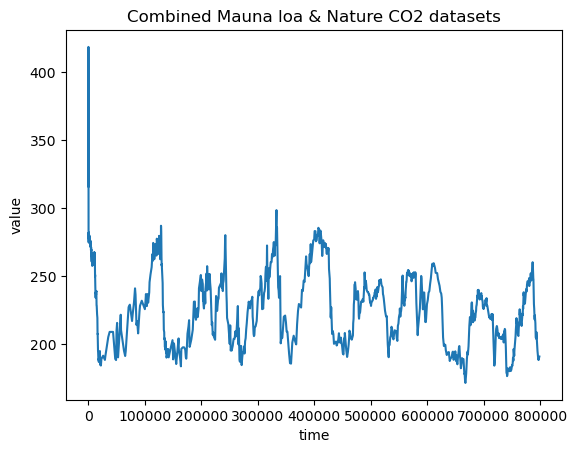

In [665]:
plt.plot(co2_nature_mauna_loa['EDC3_gas_a (yr)'],co2_nature_mauna_loa['CO2 (ppmv)'])
plt.xlabel('time')
plt.ylabel('value')
plt.title('Combined Mauna loa & Nature CO2 datasets')
#plt.legend()
plt.show()

In [666]:
co2_nature_mauna_loa.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [667]:
co2_nature_mauna_loa.describe()

,EDC3_gas_a (yr),CO2 (ppmv)
count,1160.000000,1160.000000
mean,369336.518103,237.867828
std,269951.176372,40.208643
min,-72.000000,171.600000
25%,114474.750000,208.875000
50%,390921.000000,233.800000
75%,608013.250000,257.250000
max,798512.000000,418.530000


In [668]:
co2_nature_mauna_loa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EDC3_gas_a (yr)  1160 non-null   int64  
 1   CO2 (ppmv)       1160 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 27.2 KB


***

### *Part of the project scope is to export fused datsets to .csv and .json formats*

In [669]:
co2_nature_mauna_loa.to_csv('fused datasets\co2_nature_mauna_loa.csv', encoding='utf-8', index=False)

To convert to .json I found code sample at [5] *Convert Pandas DataFrame to JSON format*, Stackoverflow, #https://stackoverflow.com/questions/39257147/convert-pandas-dataframe-to-json-format

In [670]:
co2_nature_mauna_loa.to_json('fused datasets\co2_nature_mauna_loa.json',orient='records')

In [671]:
co2_nature_mauna_loa

,EDC3_gas_a (yr),CO2 (ppmv)
0,-9,315.98
1,-10,316.91
2,-11,317.64
3,-12,318.45
4,-13,318.99
...,...,...
1091,794608,199.40
1092,795202,195.20
1093,796467,189.30
1094,797099,188.40


As discussed, for this section my aim was to import 3 CO2 datasets from IPCC, Nature and Mauna loa. I have analyed and plotted each dataset. I fused the Nature and Mauna Loa datasets to create a more compete dataset. This is the dataset i will use going forward for C02 analysis. i have exported the fused dataset to a folder called 'fused datasets'.

***

# Importing and analysing Temperature datasets

I will Import Temperature datsets from NOAA and Jouzel. I will examine each dataset and plot the relevant variables to determine which dataset is most suitable for further analysis.

The  NOAA temperature datset is located at [6] *EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates*, World Data Center for Paleoclimatology, Boulder and NOAA Paleoclimatology Program,https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt. This dataset provides information about the temperature **anomaly** estimates over the past st 800,000 years, based on the analysis of air bubbles trapped in Antarctic ice cores. The dataset is derived from the EPICA Dome C ice core, which was drilled at a site in East Antarctica with an average annual temperature of -54.5°C .The datset is available [3] *Antarctic Ice Cores Revised 800KYr CO2 Data*, National Oceanic and Atmospheric Administration,  https://www.ncei.noaa.gov/access/paleo-search/study/17975. The two variables we are intersted in are AGE and Temperature which captures the anomaly data.This dataset contains the reconstruction of temperature anomaly estimaes as far back as 800 kyr B.P. (thousand years before present, where present is defined as 1950.


In [672]:
temp_noaa=pd.read_csv('imported_datasets/Temp data NOAA.csv',skiprows=range(91),delimiter=r"\s+")
temp_noaa=temp_noaa.dropna()

In [673]:
temp_noaa.head()

,Bag,ztop,Age,Deuterium,Temperature
12,13,6.60,38.37379,-390.9,0.88
13,14,7.15,46.81203,-385.1,1.84
14,15,7.70,55.05624,-377.8,3.04
15,16,8.25,64.41511,-394.1,0.35
16,17,8.80,73.15077,-398.7,-0.42


In [674]:
temp_noaa.describe()

,Bag,ztop,Age,Deuterium,Temperature
count,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000
mean,2907.847364,1598.766050,190506.560624,-417.796420,-4.580228
std,1670.376955,918.707325,192554.547328,18.000275,3.446971
min,13.000000,6.600000,38.373790,-449.500000,-10.580000
25%,1462.000000,803.550000,46793.812500,-432.500000,-7.450000
50%,2908.000000,1598.850000,122110.190000,-421.300000,-5.200000
75%,4354.000000,2394.150000,273338.430000,-403.300000,-1.820000
max,5800.000000,3189.450000,801662.000000,-361.200000,5.460000


In [675]:
temp_noaa.dtypes

Bag              int64
ztop           float64
Age            float64
Deuterium      float64
Temperature    float64
dtype: object

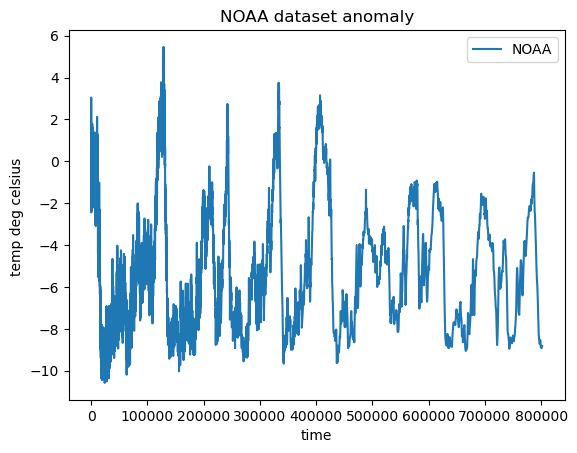

In [676]:
plt.plot(temp_noaa['Age'],temp_noaa['Temperature'], label = 'NOAA')
plt.xlabel('time')
plt.ylabel('temp deg celsius ')
plt.title('NOAA dataset anomaly')
plt.legend()
plt.show()

The Jouzel dataset is based on water isotope data from the EPICA Dome C ice core. data to estimate the Antarctic temperature variations over the past 800,000 years. [7] *6. Climate is always changing. Why is climate change of concern now?*, The Royal Society, https://royalsociety.org/topics-policy/projects/climate-change-evidence-causes/question-6/. The Jouzel datset is availabe from the Pangea website. This dataset has the estimated temperature in kelvin. To have the same unit of measure as NOAA dataset, I will add a new variable called temp_jouzel which will convert kelvin to degrees celsius. 

In [677]:
temp_jouzel=pd.read_csv('imported_datasets/Temp Data Jouzel.csv',encoding='Latin')
temp_jouzel

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


creating a new column called temp_jouzel, to convert temp column from Kelvin to celsius

In [678]:
temp_jouzel['celsius'] = temp_jouzel['temp'] - 272.15

In [679]:
temp_jouzel.dtypes

bag               int64
ztop            float64
EDC3béta        float64
AICC2012        float64
deutfinal       float64
temp            float64
acc-EDC3beta    float64
celsius         float64
dtype: object

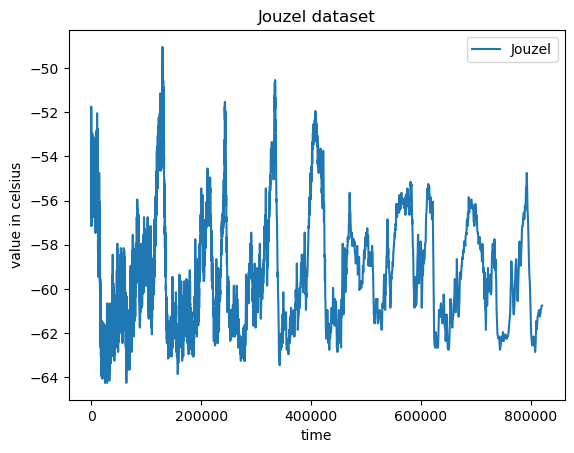

In [680]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['celsius'], label = 'Jouzel')
plt.xlabel('time')
plt.ylabel('value in celsius')
plt.title('Jouzel dataset')
plt.legend()
plt.show()

I now want to compare both datasets and select which dataset will be used.

I will create a new variable called 'difference' which will be a calculation of *temp* variable from Jouzel dataset minus *218.32 which is comparable .88 anomaly value in NOAA dataset

In [681]:
temp_jouzel['difference'] = temp_jouzel['temp'] - 218.32
temp_jouzel

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta,celsius,difference
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321,-53.85,-0.02
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805,-53.85,-0.02
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404,-53.85,-0.02
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025,-53.85,-0.02
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453,-53.85,-0.02
...,...,...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000,-61.15,-7.32
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000,-60.95,-7.12
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000,-60.85,-7.02
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000,-60.75,-6.92


By plotting both datasets we can compare to confirm both are aligned

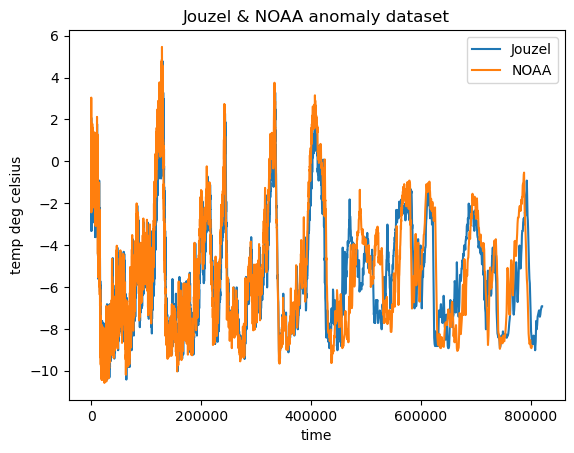

In [682]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['difference'], label = 'Jouzel')
plt.plot(temp_noaa['Age'],temp_noaa['Temperature'], label = 'NOAA')
plt.xlabel('time')
plt.ylabel('temp deg celsius')
plt.title('Jouzel & NOAA anomaly dataset')
plt.legend()
plt.show()

From the plot above, i can see both datasets are comparable.

As discussed, I have imported both temperature datsets from NOAA and Jouzel. I have examined both datasets and by adding new variables I can confirm both dataset are similar as can be seen from the plots. For further analysis, I will use the NOAA dataset.

***

# 3. Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)


This dataset contains the methane concentration measurements from the EPICA Dome C ice core in Antarctica1. [2] *Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present*, AGU PUBLICATIONS, https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1002/2014GL061957 is a dataset that provides information about the methane levels over the past 800,000 years, based on the analysis of air bubbles trapped in Antarctic ice cores. Its is measured in part per billion (ppb) The dataset is derived from the EPICA Dome C ice core. One of the largest sources of methane are agriculture. The dataset is available here [8] https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt. This dataset contains the reconstruction of temperature anomaly estimaes as far back as 800 kyr B.P. (thousand years before present, where present is defined as 1950.



In order to import methane file I needed to select a delimiter [9] *How to read file with space separated values in pandas*, Stackoverflow, https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas

In [683]:
methane_noaa=pd.read_csv('imported_datasets/Methane NOAA.csv',delimiter=r"\s+")

In [684]:
methane_noaa

,Depth,Age,CH4_mean,1s,Lab.
0,99.34,13,907,10.0,b
1,102.45,126,784,10.0,g
2,102.58,130,762,10.0,b
3,103.34,151,710,10.0,g
4,104.33,184,727,10.0,g
...,...,...,...,...,...
2098,3188.08,794938,428,10.0,g
2099,3188.95,796320,418,10.0,b
2100,3189.43,797277,396,10.0,g
2101,3190.03,798417,458,10.0,g


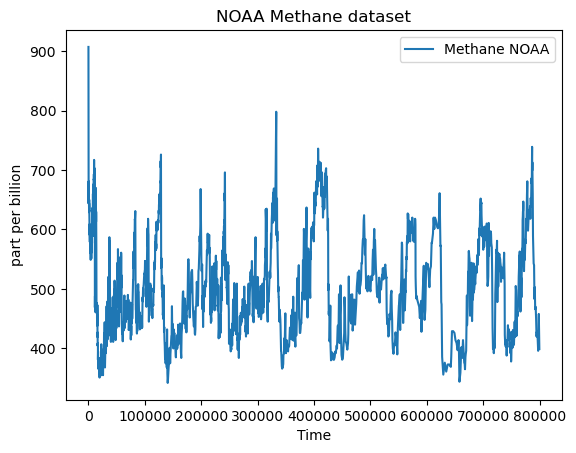

In [685]:
plt.plot(methane_noaa['Age'],methane_noaa['CH4_mean'], label = 'Methane NOAA')
plt.xlabel('Time')
plt.ylabel('part per billion')
plt.title('NOAA Methane dataset')
plt.legend()
plt.show()

In [686]:
methane_noaa.dtypes

Depth       float64
Age           int64
CH4_mean      int64
1s          float64
Lab.         object
dtype: object

***

# Examining the Irish context

I will import and analyse two dataset relating to Ireland.The first dataset is Composite Rainfall Time Series from 1711-2016 for Ireland and the second dataset is Ireland Mean Temperatures_1900-2022_annual. I will examine each dataset and plot the relevant variables.

Composite Rainfall Time Series from 1711-2016 dataset available @ [10] *Long Term Data Sets* , The Irish Meteorological Service, 'https://www.met.ie/climate/available-data/long-term-data-sets/ contains the monthly rainfall from 1711 to 2016.

In [687]:
comp_irish_rainfall=pd.read_csv('imported_datasets/Composite Rainfall Ireland.csv')

In [688]:
comp_irish_rainfall

,Year,Month,Median montly series
0,1711,1,16.4
1,1711,2,73.1
2,1711,3,121.2
3,1711,4,85.2
4,1711,5,66.6
...,...,...,...
3667,2016,8,79.1
3668,2016,9,108.1
3669,2016,10,51.8
3670,2016,11,58.0


plotting irish rainfall

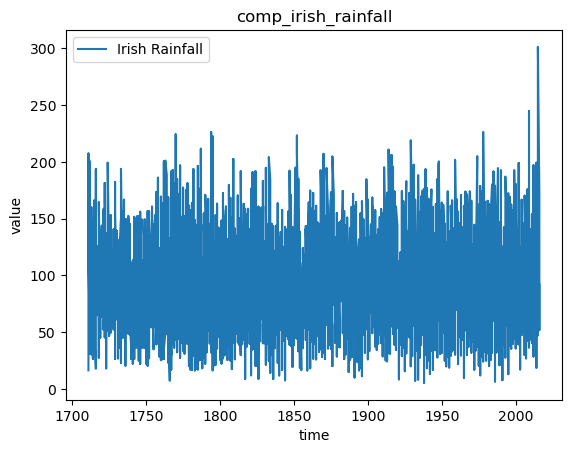

In [689]:
plt.plot(comp_irish_rainfall['Year'],comp_irish_rainfall['Median montly series'], label = 'Irish Rainfall')
plt.xlabel('time')
plt.ylabel('value')
plt.title('comp_irish_rainfall')
plt.legend()
plt.show()

above plot very messy so going to get yearly average

In [690]:
mean_yearly_irish_rainfall = comp_irish_rainfall.groupby('Year')['Median montly series'].mean()


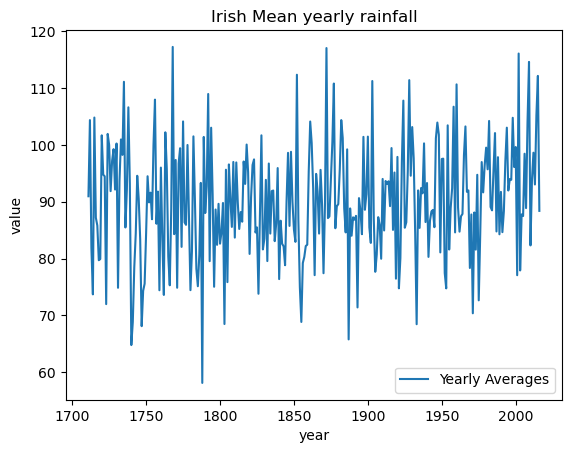

In [691]:
plt.plot(mean_yearly_irish_rainfall, label='Yearly Averages')
plt.xlabel('year')
plt.ylabel('value')
plt.title('Irish Mean yearly rainfall')
plt.legend()
plt.show()

I will now Import irish temperature datsets from [11] The Irish Meteorological Service , https://www.met.ie/cms/assets/uploads/2023/12/LongTermTemperatures_1900-2022_annual.csv . This dataset contains mean Irish temperature in degrees celsius from 1900 to 2022.

In [692]:
irish_temp=pd.read_csv('imported_datasets/Ireland MeanTemperatures_1900-2022_annual.csv')

In [693]:
irish_temp

,year,Annual
0,2022,10.9
1,2021,10.5
2,2020,10.4
3,2019,10.5
4,2018,10.3
...,...,...
118,1904,9.1
119,1903,9.1
120,1902,9.2
121,1901,9.1


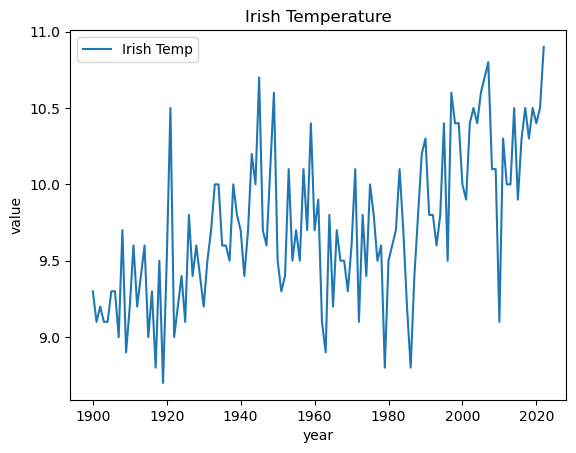

In [694]:
plt.plot(irish_temp['year'],irish_temp['Annual'], label = 'Irish Temp')
plt.xlabel('year')
plt.ylabel('value')
plt.title('Irish Temperature')
plt.legend()
plt.show()

***

# 5. Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats

*Part of the project scope is to export fused datsets to .csv and .json formats*
I will combine 'fused Nature CO2 & Mauna Loa', temperature dataset from NOAA, methane dataset from NOAA and save a file called 'combined_datasets' in fused datasets folder in .csv and .json format.

In [695]:
fused_datasets = pd.concat([co2_nature_mauna_loa,temp_noaa, methane_noaa,comp_irish_rainfall,mean_yearly_irish_rainfall,irish_temp], ignore_index=True)

In [696]:
fused_datasets.to_csv('fused datasets\combined_datasets.csv', encoding='utf-8')

to write to .json format [12] *Convert Pandas DataFrame to JSON format*, stackoverflow, https://stackoverflow.com/questions/39257147/convert-pandas-dataframe-to-json-format

In [697]:
fused_datasets.to_json('fused datasets\combined_datasets.json',orient='split')

Plotting CO2 , Temperature and Methane over 800000 years

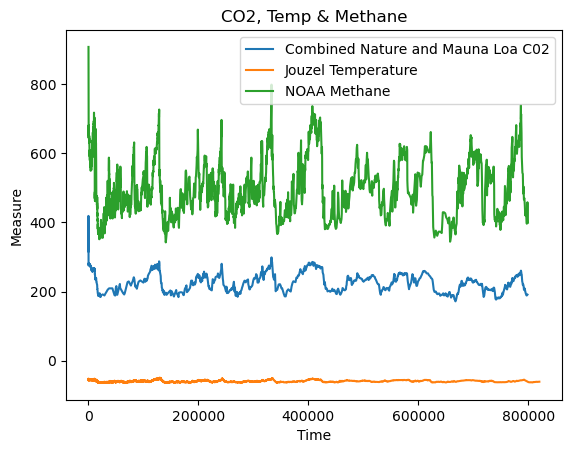

In [698]:
plt.plot(co2_nature_mauna_loa['EDC3_gas_a (yr)'],co2_nature_mauna_loa['CO2 (ppmv)'], label = 'Combined Nature and Mauna Loa C02')
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['celsius'], label = 'Jouzel Temperature')
plt.plot(methane_noaa['Age'],methane_noaa['CH4_mean'], label = 'NOAA Methane')
plt.xlabel('Time')
plt.ylabel('Measure')
plt.title('CO2, Temp & Methane')
plt.legend()
plt.show()

Plotting Irish data 

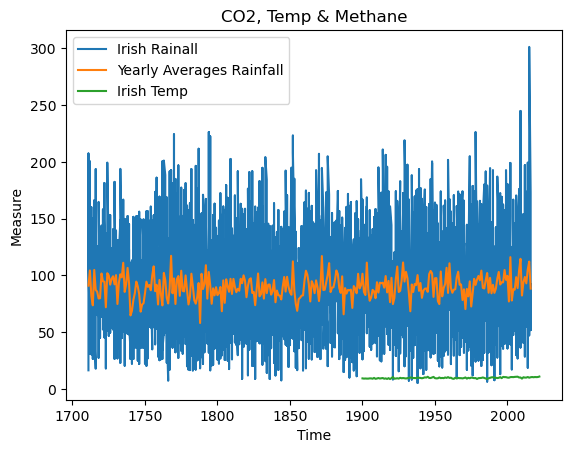

In [699]:
plt.plot(comp_irish_rainfall['Year'],comp_irish_rainfall['Median montly series'], label = 'Irish Rainall')
plt.plot(mean_yearly_irish_rainfall, label='Yearly Averages Rainfall')
plt.plot(irish_temp['year'],irish_temp['Annual'], label = 'Irish Temp')
plt.xlabel('Time')
plt.ylabel('Measure')
plt.title('CO2, Temp & Methane')
plt.legend()
plt.show()

***

# 6. For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).

## Lead lag/Analysis

Lead lag analysis is a method of studying the relationship between two or more variables that change over time. It can help identify which variable leads or lags the others, and by how much. I will investigate the lead/lag nature of the following variables 
* CO2 vs Temperature anomaly
* Temperature anomaly vs Methane
* CO2 vs Methane
* CO2 vs irish rainfall
* Irish temp vs irish rainfall

I will perform a simple lead/lag analysis on variables in my datasets. The code for this analysis was sourced here [13] *scipy.signal.correlation_lags*, The SciPy community, https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlation_lags.html

Selecting variabled from relevant datasets for analysis

In [700]:
ts1=co2_nature_mauna_loa['CO2 (ppmv)']
ts2=temp_noaa['Temperature']
ts3=methane_noaa['CH4_mean']
ts4=mean_yearly_irish_rainfall
ts5=irish_temp['Annual']

CO2 vs Temperature anomaly

In [701]:
corr = signal.correlate(ts1,ts2,mode='same')
n = len(corr)
lags = np.linspace(-n/2, n/2, n)
max_lag = lags[np.argmax(corr)]

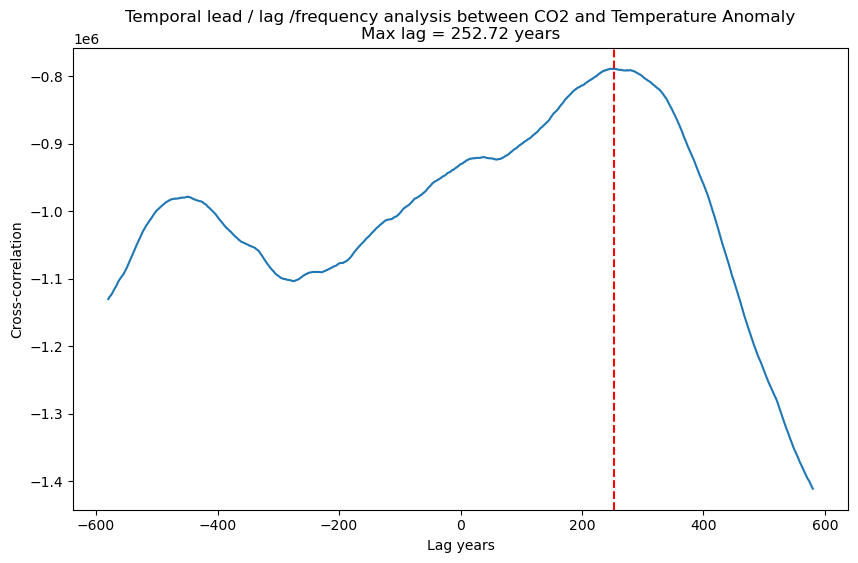

In [702]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between CO2 and Temperature Anomaly\nMax lag = {max_lag:.2f} years')
#plt.legend()
plt.show()

From above plot the data suggests that  CO2 lags temperature  CO2 by 250  years. I found this to be very suprising but upon research I came upon the following article [13] *Lead–lag relationships between global mean temperature and the atmospheric CO2 content in dependence of the type and time scale of the forcing*, ScienceDirect, https://www.sciencedirect.com/science/article/abs/pii/S0921818116301278
'One of the popular arguments in support of these hypotheses is a mutual lag between the temperature and the atmospheric CO2 content derived from the East Antarctic ice cores: according to these data the CO2 content lags (rather than leads) temperature (Monnin et al., 2001, Caillon et al., 2003, Mokhov et al., 2005a, Bereiter et al., 2012) by several centuries' 


Temperature anomaly vs Methane

In [703]:
corr = signal.correlate(ts3,ts2,mode='same')
n = len(corr)
lags = np.linspace(-n/2, n/2, n)
max_lag = lags[np.argmax(corr)]

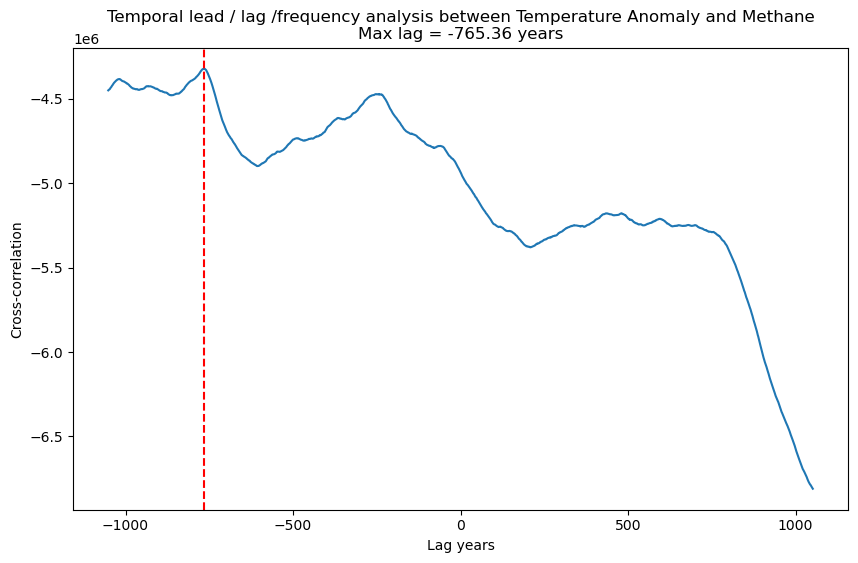

In [704]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between Temperature Anomaly and Methane\nMax lag = {max_lag:.2f} years')
#plt.legend()
plt.show()

from the above plot we can see methane increase lags temperature increase by 765 years, this is consistent with a study by Schaefer et al. (2016) and Mann et al. (2014) that Methane does not lead temperature increase but lags behind by centurires.

CO2 vs Methane

In [705]:
corr = signal.correlate(ts1,ts3,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)

max_lag = lags[np.argmax(corr)]

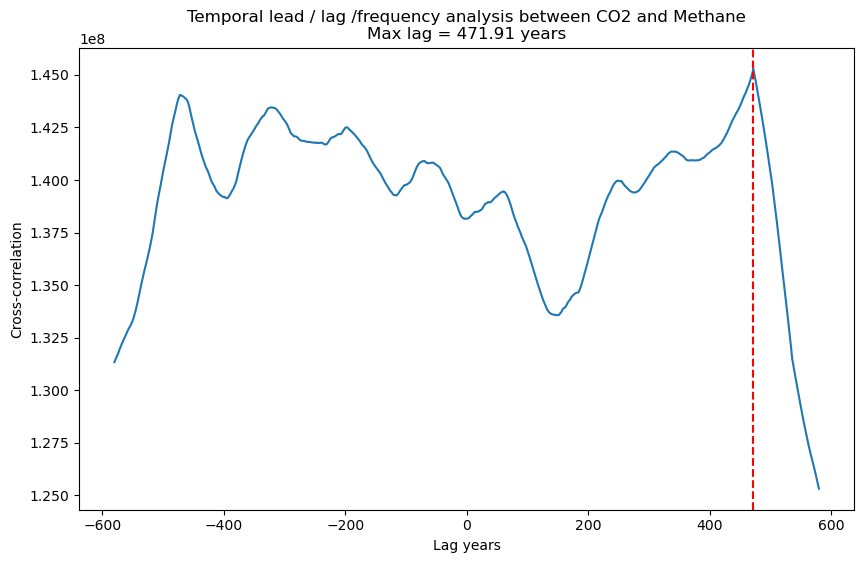

In [706]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between CO2 and Methane\nMax lag = {max_lag:.2f} years')
#plt.legend()
plt.show()

CO2 and Methane are both greenhouse gases that contribute to global warming, From above plot we can see metane increase lags c02 increase by ~ 500 years

irish temp v irish rainfall

In [707]:
corr = signal.correlate(ts4,ts5,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)
max_lag = lags[np.argmax(corr)]

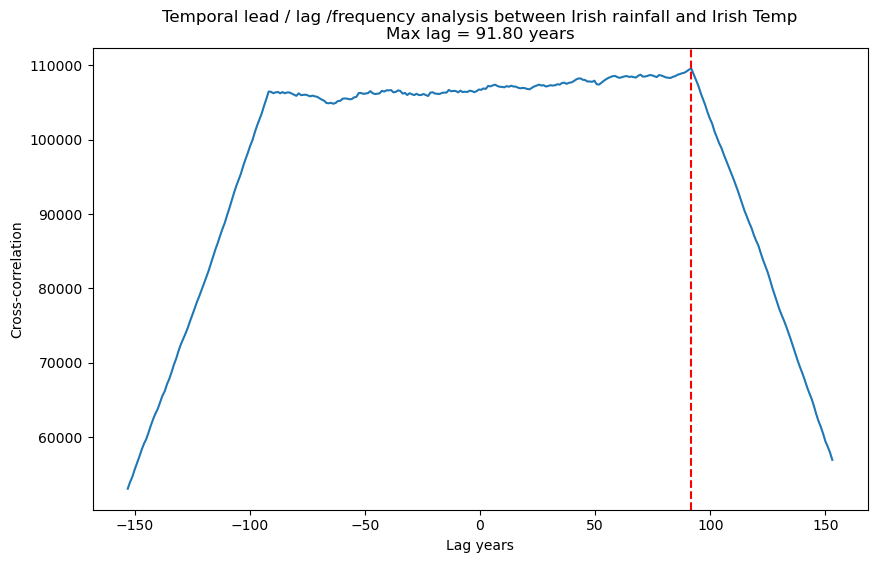

In [708]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between Irish rainfall and Irish Temp\nMax lag = {max_lag:.2f} years')
#plt.legend()
plt.show()

Temperature and rainfall are both important climatic variables that do not have a linear relationship. This plot is calculating ~90 yr lag  between these variables.

co2 v irish temp

In [709]:
corr = signal.correlate(ts1,ts5,mode='same')
n = len(corr)
lags = np.linspace(-n/2, n/2, n)
max_lag = lags[np.argmax(corr)]

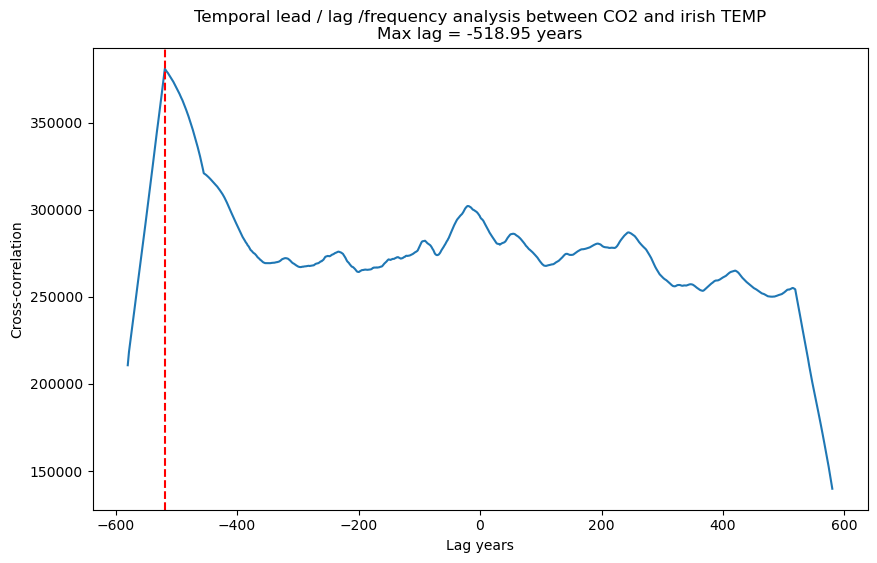

In [710]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between CO2 and irish TEMP\nMax lag = {max_lag:.2f} years')
#plt.legend()
plt.show()

there is a lag of 250 years globally, so comparing co2 and irish temperature there is ~ 520 year lag.

***

## Fourier transform
The fourier transform is a tool used to decompose data into its component frequencies. The most basic type is Fast Fourier transform, which I will use. [14] *Fourier Transforms With scipy.fft: Python Signal Processing*, realpython, https://realpython.com/python-scipy-fft/

CODE TAKEN FROM  [14] *Fourier Transforms With scipy.fft: Python Signal Processing*, realpython, https://realpython.com/python-scipy-fft/. To zoom in to see peaks I used code from [15] *How to set the axis limits*, stackoverflow, https://stackoverflow.com/questions/3777861/how-to-set-the-axis-limits. All variables have peak amplitude @ close to 0 frequency, 

In [711]:
y = co2_nature_mauna_loa['CO2 (ppmv)'].to_numpy()
y = y - np.mean(y)
y = np.ascontiguousarray(y)
yf = np.fft.fft(y) # Frequency spectrum
xf = fftfreq(y.size)

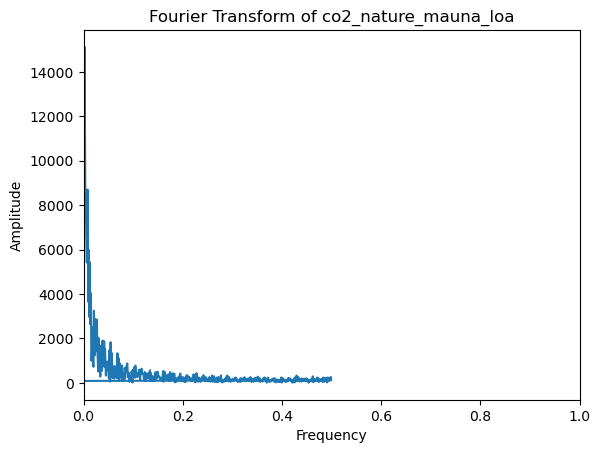

In [712]:
plt.plot(xf, np.abs(yf)) # Plot the magnitude of the spectrum
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of co2_nature_mauna_loa')
plt.xlim(0, 1) # zoom in to see the peaks
plt.show()


In [713]:
# Extract the temperature column as a numpy array
y = temp_noaa["Temperature"].to_numpy()
y = y - np.mean(y)
yf = np.fft.fft(y) # Frequency spectrum
xf = fftfreq(y.size)


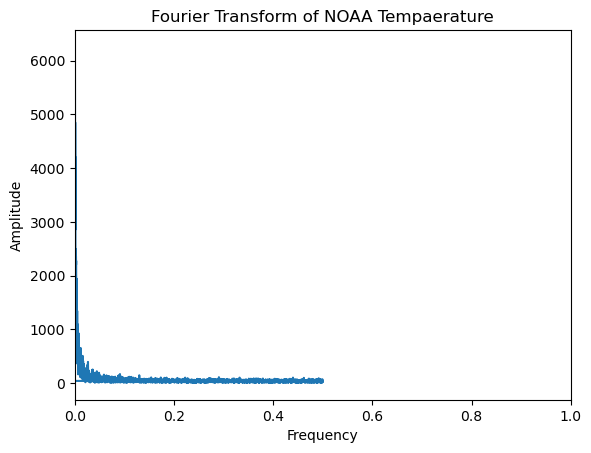

In [714]:
plt.plot(xf, np.abs(yf)) # Plot the magnitude of the spectrum
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of NOAA Tempaerature')
plt.xlim(0, 1) # zoom in to see the peaks
plt.show()


In [715]:
# Extract the temperature column as a numpy array
y = methane_noaa["CH4_mean"].to_numpy()
y = y - np.mean(y)

yf = np.fft.fft(y) # Frequency spectrum
xf = fftfreq(y.size)


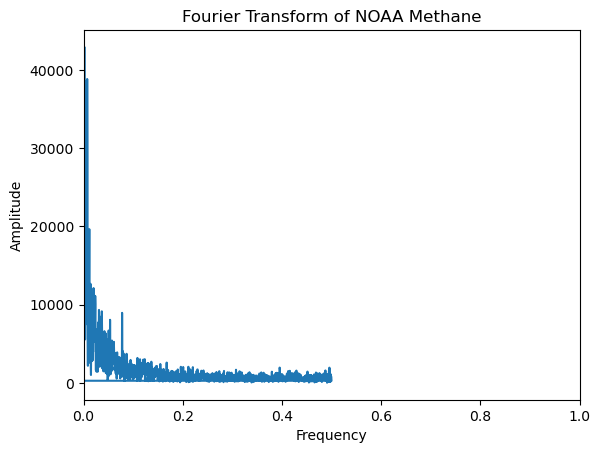

In [716]:
plt.plot(xf, np.abs(yf)) # Plot the magnitude of the spectrum
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of NOAA Methane')
plt.xlim(0, 1) # zoom in to see the peaks
plt.show()


Irish Context

In [717]:
# Extract the temperature column as a numpy array
y = irish_temp['Annual'].to_numpy()
y = y - np.mean(y)

yf = np.fft.fft(y) # Frequency spectrum

xf = fftfreq(y.size)

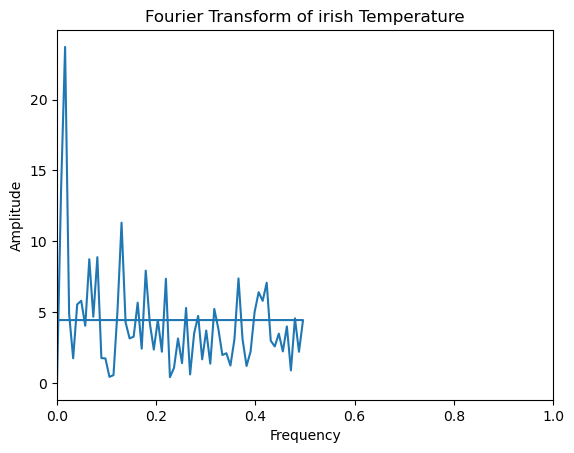

In [718]:
plt.plot(xf, np.abs(yf)) # Plot the magnitude of the spectrum
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of irish Temperature')
plt.xlim(0, 1) # zoom in to see the peaks
plt.show()


In [719]:
# Extract the temperature column as a numpy array
y = mean_yearly_irish_rainfall.to_numpy()
y = y - np.mean(y)

yf = np.fft.fft(y) # Frequency spectrum

xf = fftfreq(y.size)

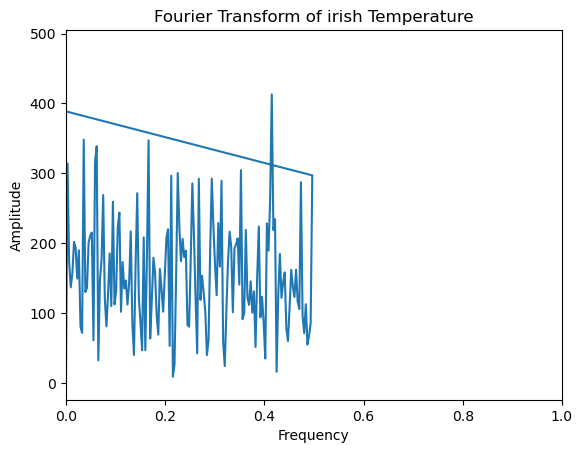

In [720]:
plt.plot(xf, np.abs(yf)) # Plot the magnitude of the spectrum
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of irish Temperature')
plt.xlim(0, 1) # zoom in to see the peaks
plt.show()

# Frequency Analysis

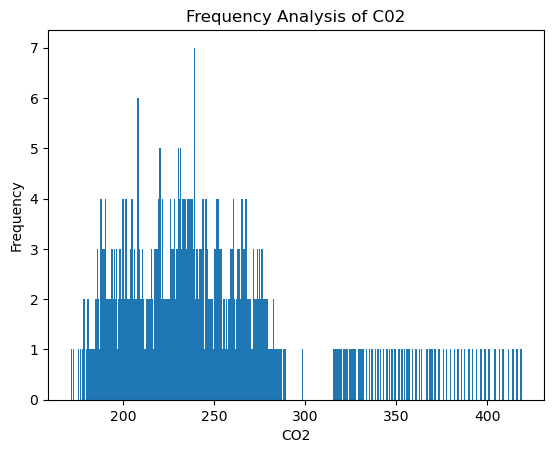

In [721]:
freq = ts1.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("CO2")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of C02")
plt.show()

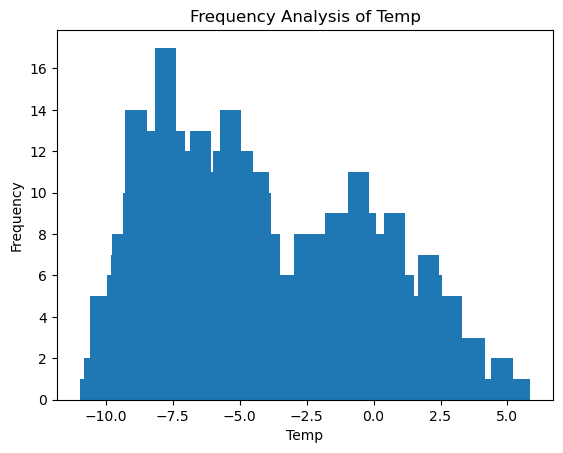

In [722]:
freq = ts2.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Temp")
plt.show()

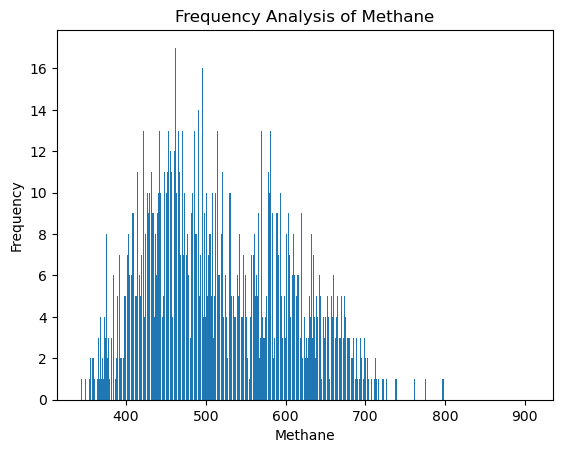

In [723]:
freq = ts3.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Methane")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Methane")
plt.show()

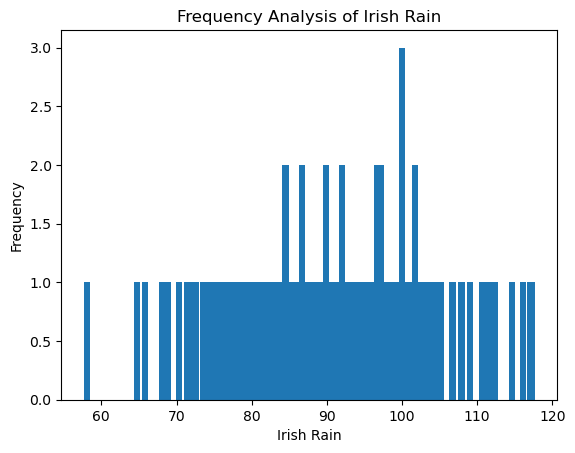

In [724]:
freq = ts4.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Irish Rain")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Irish Rain")
plt.show()

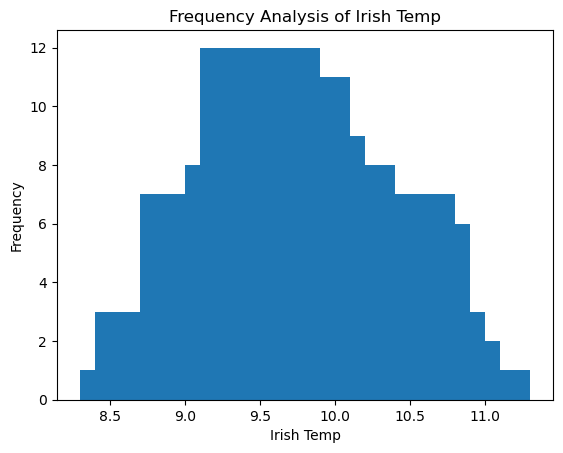

In [725]:
freq = ts5.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Irish Temp")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Irish Temp")
plt.show()

***

# 7. Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue

Temperature anomaly file located at  [16] *Average temperature anomaly, Global*, ourworldindata.org, https://ourworldindata.org/grapher/temperature-anomaly. 

In [793]:
##https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series/tutorial
df =pd.read_csv('temperature-anomaly ow.csv')

In [794]:
df

,Entity,Code,Year,Global average temperature anomaly relative to 1961-1990,Upper bound of the annual temperature anomaly (95% confidence interval),Lower bound of the annual temperature anomaly (95% confidence interval)
0,Global,NaN,1850,-0.417659,-0.246115,-0.589203
1,Global,NaN,1851,-0.233350,-0.054832,-0.411868
2,Global,NaN,1852,-0.229399,-0.049416,-0.409382
3,Global,NaN,1853,-0.270354,-0.110700,-0.430009
4,Global,NaN,1854,-0.291630,-0.150436,-0.432824
...,...,...,...,...,...,...
517,Southern hemisphere,NaN,2019,0.638402,0.691337,0.585467
518,Southern hemisphere,NaN,2020,0.569861,0.622008,0.517714
519,Southern hemisphere,NaN,2021,0.445762,0.499180,0.392344
520,Southern hemisphere,NaN,2022,0.502866,0.557362,0.448371


In [796]:
df = df.query("Entity == 'Global'")

In [798]:
df

,Entity,Code,Year,Global average temperature anomaly relative to 1961-1990,Upper bound of the annual temperature anomaly (95% confidence interval),Lower bound of the annual temperature anomaly (95% confidence interval)
0,Global,NaN,1850,-0.417659,-0.246115,-0.589203
1,Global,NaN,1851,-0.233350,-0.054832,-0.411868
2,Global,NaN,1852,-0.229399,-0.049416,-0.409382
3,Global,NaN,1853,-0.270354,-0.110700,-0.430009
4,Global,NaN,1854,-0.291630,-0.150436,-0.432824
...,...,...,...,...,...,...
169,Global,NaN,2019,0.891073,0.925358,0.856787
170,Global,NaN,2020,0.922794,0.957376,0.888212
171,Global,NaN,2021,0.761856,0.798268,0.725443
172,Global,NaN,2022,0.801284,0.837317,0.765251


In [800]:
df = df.sort_values(by="Year", ascending=False)

In [802]:
df

,Entity,Code,Year,Global average temperature anomaly relative to 1961-1990,Upper bound of the annual temperature anomaly (95% confidence interval),Lower bound of the annual temperature anomaly (95% confidence interval)
173,Global,NaN,2023,0.996559,1.068727,0.924391
172,Global,NaN,2022,0.801284,0.837317,0.765251
171,Global,NaN,2021,0.761856,0.798268,0.725443
170,Global,NaN,2020,0.922794,0.957376,0.888212
169,Global,NaN,2019,0.891073,0.925358,0.856787
...,...,...,...,...,...,...
4,Global,NaN,1854,-0.291630,-0.150436,-0.432824
3,Global,NaN,1853,-0.270354,-0.110700,-0.430009
2,Global,NaN,1852,-0.229399,-0.049416,-0.409382
1,Global,NaN,1851,-0.233350,-0.054832,-0.411868


In [812]:
prev_40_years=df.head(40)

In [813]:
prev_40_years

,Entity,Code,Year,Global average temperature anomaly relative to 1961-1990,Upper bound of the annual temperature anomaly (95% confidence interval),Lower bound of the annual temperature anomaly (95% confidence interval)
173,Global,NaN,2023,0.996559,1.068727,0.924391
172,Global,NaN,2022,0.801284,0.837317,0.765251
171,Global,NaN,2021,0.761856,0.798268,0.725443
170,Global,NaN,2020,0.922794,0.957376,0.888212
169,Global,NaN,2019,0.891073,0.925358,0.856787
168,Global,NaN,2018,0.762654,0.794256,0.731052
167,Global,NaN,2017,0.845174,0.875574,0.814775
166,Global,NaN,2016,0.932927,0.964091,0.901764
165,Global,NaN,2015,0.825114,0.858942,0.791287
164,Global,NaN,2014,0.672872,0.706838,0.638905


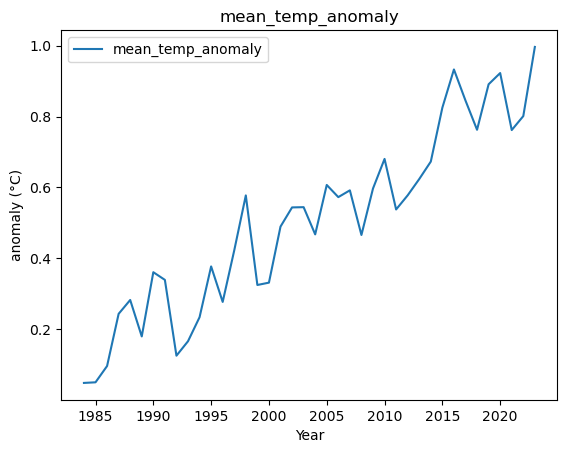

In [815]:
plt.plot(prev_40_years['Year'],prev_40_years['Global average temperature anomaly relative to 1961-1990'], label = 'mean_temp_anomaly')
plt.xlabel('Year')
plt.ylabel('anomaly (°C)')
plt.title('mean_temp_anomaly')
plt.legend()
plt.show()

I will sort dataframe again by year ascending in order for plot to be correct

In [820]:
prev_40_yearsa = prev_40_years.sort_values(by="Year")

In [821]:
prev_40_yearsa = prev_40_yearsa.copy()
prev_40_yearsa['time'] = np.arange(len(prev_40_yearsa.index))
prev_40_yearsa.tail()

,Entity,Code,Year,Global average temperature anomaly relative to 1961-1990,Upper bound of the annual temperature anomaly (95% confidence interval),Lower bound of the annual temperature anomaly (95% confidence interval),time
169,Global,NaN,2019,0.891073,0.925358,0.856787,35
170,Global,NaN,2020,0.922794,0.957376,0.888212,36
171,Global,NaN,2021,0.761856,0.798268,0.725443,37
172,Global,NaN,2022,0.801284,0.837317,0.765251,38
173,Global,NaN,2023,0.996559,1.068727,0.924391,39


In [822]:
#from sklearn.linear_model import LinearRegression

# Training data
xt = prev_40_yearsa.loc[:, ['time']]  # features
yt = prev_40_yearsa.loc[:, 'Global average temperature anomaly relative to 1961-1990']  # target

# Train the model
model = LinearRegression()
model.fit(xt, yt)

# Store the fitted values as a time series with the same time index as
# the training data
y_predt = pd.Series(model.predict(xt), index=xt.index)

In [823]:
future_years = pd.date_range(start='2025', end='2065', freq='Y') # Create a date range of future years

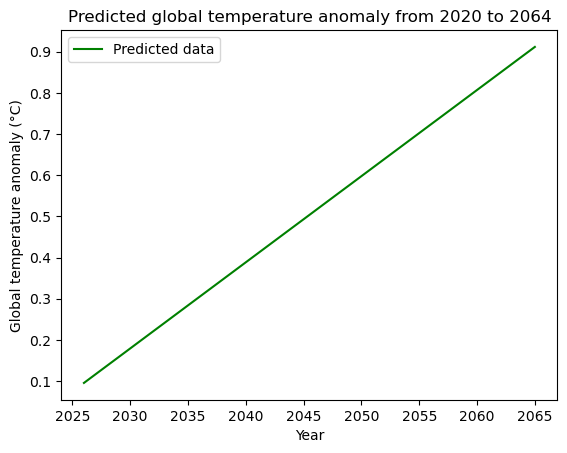

In [824]:

plt.plot( future_years,y_predt, color='green', label='Predicted data')

plt.xlabel('Year')
plt.ylabel('Global temperature anomaly (°C)')
plt.title('Predicted global temperature anomaly from 2020 to 2064')
plt.legend()
plt.show()

## 8. Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)


using the linear regressiom model above it is clear that Earth will continue to warm. This a serious issue that governments are worlwide are trying to tackle. From reserarching this topic on IPCC webiste, 

* For 1.5°C of global warming, there will be increasing heat waves, longer warm seasons and shorter cold seasons.
* At 2°C of global warming, heat extremes would more often reach critical tolerance thresholds for agriculture and health, the report shows.https://www.ipcc.ch/2021/08/09/ar6-wg1-20210809-pr/

Climate change is bringing multiple different changes in different regions – which will all increase with further warming. These include changes to wetness and dryness, to winds, snow and ice, coastal areas and oceans. For example:

* Climate change is intensifying the water cycle. This brings more intense rainfall and associated flooding, as well as more intense drought in many regions.
* Climate change is affecting rainfall patterns. In high latitudes, precipitation is likely to increase, while it is projected to decrease over large parts of the subtropics. Changes to monsoon precipitation are expected, which will vary by region.
* Coastal areas will see continued sea level rise throughout the 21st century, contributing to more frequent and severe coastal flooding in low-lying areas and coastal erosion. Extreme sea level events that previously occurred once in 100 years could happen every year by the end of this century.

The accellerating warming is changing polar ice coverage. Scientists have tracked ice coverage in the Arctic since 1979. The past 15 years have shown a lower extent of Arctic ice coverage compared to the previous 27 years https://www.climatedepot.com/2021/09/29/arctic-ice-coverage-is-up-substantially-so-media-ignores-it/. The NASA website https://earth.gsfc.nasa.gov/cryo/data/current-state-sea-ice-cover showprev_40_years=entitythat both Artic and Antartic polar regions are showing declines in ice cover due to temperature increase. The polar ice is home to many species and this rapid change of ice coverage threatens this ecosystem.
Another issue with the polar regions melting is the thawinf of Permafrost. Permafrost https://www.sciencedaily.com/releases/2014/04/140407153939.htm is soil that is frozen year-round and is typically located in polar regions. It stores large amounts of organic carbon, which can be released into the atmosphere as greenhouse gases such as carbon dioxide and methane when it thaws.



# References

* [1] *Paleoclimatology*, Wikipedia, https://en.wikipedia.org/wiki/Paleoclimatology
* [2] *Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present*, AGU PUBLICATIONS, https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1002/2014GL061957
* [3] *Antarctic Ice Cores Revised 800KYr CO2 Data*, National Oceanic and Atmospheric Administration,  https://www.ncei.noaa.gov/access/paleo-search/study/17975.
* [4] *NOAA Atmospheric Carbon Dioxide Mole Fractions from Mauna Loa Observatory, Hawaii, United States*, National Oceanic and Atmospheric Administration,  https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc%3AC00890
* [5] *Convert Pandas DataFrame to JSON format*, Stackoverflow, #https://stackoverflow.com/questions/39257147/convert-pandas-dataframe-to-json-format
* [6] *EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates*, World Data Center for Paleoclimatology, Boulder and NOAA Paleoclimatology Program,https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt. 
* [7] *6. Climate is always changing. Why is climate change of concern now?*, The Royal Society, https://royalsociety.org/topics-policy/projects/climate-change-evidence-causes/question-6/.
* [8] https://data.world/datasets/methane
* [9] *How to read file with space separated values in pandas*, Stackoverflow, https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas
* [10] *Long Term Data Sets* , The Irish Meteorological Service, 'https://www.met.ie/climate/available-data/long-term-data-sets/
* [11] The Irish Meteorological Service , https://www.met.ie/cms/assets/uploads/2023/12/LongTermTemperatures_1900-2022_annual.csv 
* [12] *Convert Pandas DataFrame to JSON format*, stackoverflow, https://stackoverflow.com/questions/39257147/convert-pandas-dataframe-to-json-format
* [13] *scipy.signal.correlation_lags*, The SciPy community, https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlation_lags.html
* [14] *Fourier Transforms With scipy.fft: Python Signal Processing*, realpython, https://realpython.com/python-scipy-fft/
